In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import sympy as sy
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# <font face="gotham" color="purple"> 奇异值 </font>

我们已经讨论了 _谱分解_ ，它可以无条件地将任何对称矩阵分解为三个特殊的矩阵。然而，只有方阵才有特征值和特征向量，但我们希望扩展类似的概念至任意的 $m \times n$ 矩阵。

如果 $A$ 是一个 $m \times n$ 矩阵，则 $A^TA$ 和 $AA^T$ 都是对称矩阵，并且可以进行正交对角化。

In [3]:
A = np.array([[4, -3], [-3, 2], [2, -1], [1, 0]]); A

array([[ 4, -3],
       [-3,  2],
       [ 2, -1],
       [ 1,  0]])

计算 $A^TA$ 的特征值和特征向量。

In [4]:
ATA = A.T@A; ATA

array([[ 30, -20],
       [-20,  14]])

In [5]:
D1, P1 = np.linalg.eig(ATA)

检查 $P$ 是否为正交矩阵。

In [6]:
P1@P1.T

array([[1., 0.],
       [0., 1.]])

In [7]:
D1

array([43.541,  0.459])

$A^TA$ 的特征值的平方根称为 $A$ 的 <font face="gotham" color="red">奇异值</font>，用 $\sigma_1, ..., \sigma_n$ 按降序表示。

我们还可以证明 $A$ 的奇异值是向量 $A\mathbf{v}_1,..., A\mathbf{v}_n$ 的长度，其中 $\mathbf{v}_i$ 是 $A^TA$ 的特征向量。

$A\mathbf{v}_i$ 的长度是 $\|A\mathbf{v}_i\|$

$$
\|A\mathbf{v}_i\| = \sqrt{(A\mathbf{v}_i)^TA\mathbf{v}_i} = \sqrt{\mathbf{v}_i^TA^T A\mathbf{v}_i}=\sqrt{\mathbf{v}_i^T(\lambda_i\mathbf{v}_i)} = \sqrt{\lambda_i}=\sigma_1
$$

其中 $\sqrt{\mathbf{v}_i^T\mathbf{v}_i} = 1$，$\lambda_i$ 是 $A^TA$ 的特征值。

 # <font face="gotham" color="purple"> 奇异值分解</font>

奇异值分解（Singular Value Decomposition，SVD）可能是线性代数史上最重要的分解技术之一，它将我们讨论的所有理论结合起来，达到了一个高峰。

$A$是一个$m\times n$矩阵。然而$AA^T$和$A^TA$是对称矩阵，因此两者都可以正交对角化。

$$
AA^T = U\Sigma\Sigma^T U^T=(U\Sigma V^T)(V\Sigma U^T)\\
A^TA = V\Sigma^T \Sigma V^T = (V\Sigma^T U^T)(U \Sigma V^T)
$$

其中$\Sigma\Sigma^T$是一个对角矩阵，其所有特征值都是$AA^T$的特征值，$\Sigma^T \Sigma$是一个对角矩阵，其所有特征值都是$VV^T$的特征值。

因为$AA^T$和$A^TA$都是对称的，所以$UU^T= U^TU=I_{m\times m}$和$VV^T= V^TV=I_{n\times n}$。

我们已经隐式地展示了上面的奇异值分解，这是线性代数中最重要的概念之一。

<font face="gotham" color="red">
$$
\Large
SVD:\quad
A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}
$$
</font>

奇异值分解理论保证了任何矩阵 $A$，无论其秩或形状如何，都可以无条件地分解为三个特殊矩阵。

下一个问题是：$\Sigma$是什么？

它是一个 $m\times n$ 的主对角矩阵，主对角线上的所有奇异值。

$$
A^TA = V\Sigma^T \Sigma V^T = V\Sigma^2 V^T
$$

在两边后乘以 $V$

$$
A^TAV = V\Sigma^2
$$

这是 $A\mathbf{v}_i = \lambda_i \mathbf{v}_i$ 的矩阵版本，但是这里感兴趣的矩阵是 $A^TA$，而不是 $A$。同样，可以用奇异值来表示。

$$
A^TA\mathbf{v}_i = \sigma_i^2\mathbf{v}_i
$$

由于 $U$ 和 $V$ 不唯一，我们倾向于通过排列 $\sigma_1 \geq \sigma_2 \geq \sigma_3\geq ... \geq\sigma_r$ 来标准化解决方案。

我们为什么只排列 $r$ 个奇异值？因为它是 $A$ 的秩，也是 $A^TA$ 的秩。明确地说，$\Sigma$ 的形式如下：


$$\Sigma =\left[\begin{array}{cccccc}
\sqrt{\lambda_{1}} & & & & &\\
& \sqrt{\lambda_{2}} & & & &\\
& & \ddots & & &\\
& & & \sqrt{\lambda}_{\mathrm{r}} & &\\
& & & & \ddots &\\
& & & & & 0 
\end{array}\right]
=\left[\begin{array}{cccccc}
\sigma_1 & & & & &\\
& \sigma_2 & & & &\\
& & \ddots & & &\\
& & & \sigma_r & &\\
& & & & \ddots &\\
& & & & & 0 
\end{array}\right]
$$

我们可以对 $AA^T$ 也做同样的处理，得到

$$
AA^TU = U \Sigma^2
$$

或 

$$
AA^T\mathbf{u}_i = \sigma_i^2\mathbf{u}_i
$$

我们已经展示了为什么 $A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}$ 成立。

要对 $A$ 执行 SVD，我们只需要两个方程，这也是将任何矩阵分解的手动过程。

$$
A^TA = V\Sigma^T \Sigma V^T\\
AV = U\Sigma
$$

这里有一个例子，假设我们有一个数据集 $A$

In [8]:
A = np.random.rand(10, 2)

给它进行 $\text{SVD}$ 分解

In [10]:
U, S, VT = np.linalg.svd(A, full_matrices=False)

我们想将 $A_{10\times 3}$ 降维为 $A_{10\times 2}$。

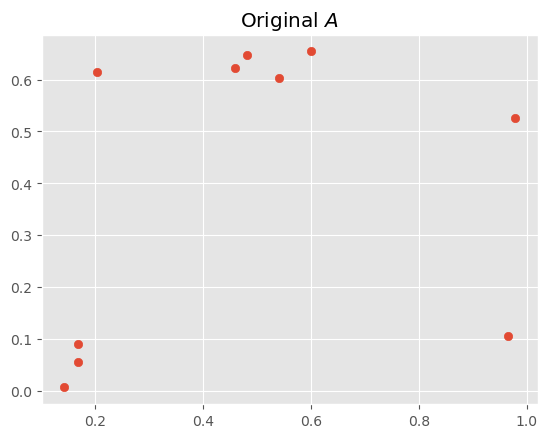

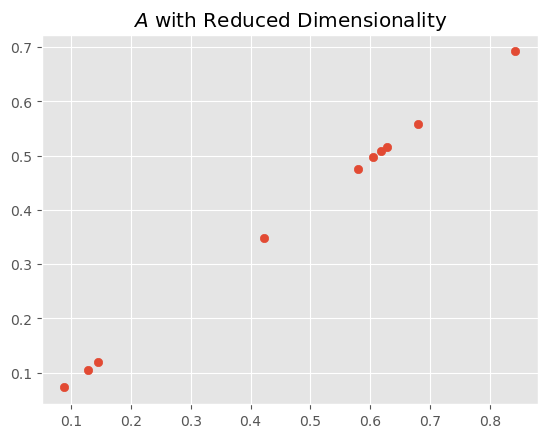

In [11]:
# Keep only the first dimension
A_reduced = np.dot(U[:, :1], np.dot(np.diag(S[:1]), VT[:1, :]))

# Plot original data
plt.scatter(A[:, 0], A[:, 1])
plt.title("Original $A$")
plt.show()

# Plot reduced data
plt.scatter(A_reduced[:, 0], A_reduced[:, 1])
plt.title("$A$ with Reduced Dimensionality")
plt.show()

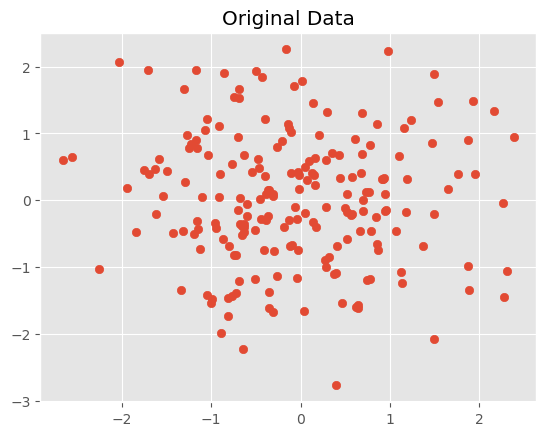

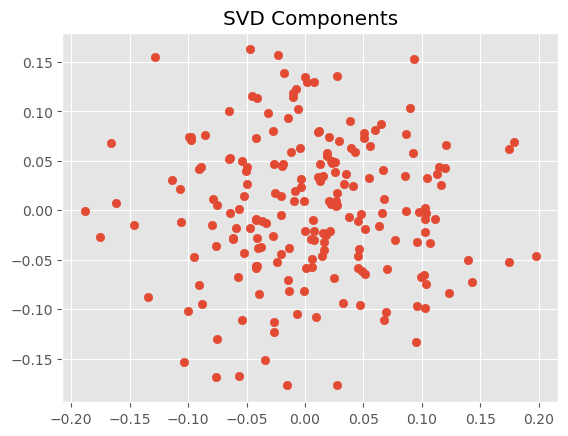

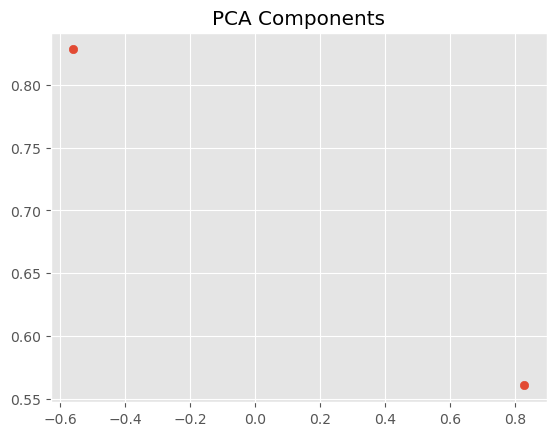

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
data = np.random.randn(200, 2)

# Perform SVD on the data
U, s, VT = np.linalg.svd(data)

# Perform PCA on the data
mean = np.mean(data, axis=0)
data_pca = data - mean
cov = np.cov(data_pca.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.title("Original Data")
plt.show()

# Plot the SVD components
plt.scatter(U[:, 0], U[:, 1])
plt.title("SVD Components")
plt.show()

# Plot the PCA components
plt.scatter(eigenvectors[:, 0], eigenvectors[:, 1])
plt.title("PCA Components")
plt.show()


## <font face="gotham" color="purple"> 重新表述SVD</font>

重写 $SVD$

$$
AV = U\Sigma
$$

向量版本是

$$
A\mathbf{v}_i = \sigma_i \mathbf{u}_i
$$

这个方程有两个含义：$(a)$ $A$ 可以分解为

$$
A = \sum_{i=1}^r\sigma_i\mathbf{u}_i \mathbf{v}_i^T
$$

$(b)$ 我们可以通过以下方式计算 $\mathbf{u}_i$

$$
\mathbf{u}_i = \frac{A\mathbf{v}_i}{\sigma_i}
$$